<a href="https://colab.research.google.com/github/TrSaleMane/deep-learning-from-step-by-step/blob/main/vol03_dl_basics/vol03_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vol.3：ディープラーニングの超基本

このノートブックでは、ディープラーニングの基本概念を直感的に理解します。  
特に、**活性化関数（ReLU / Sigmoid / Tanh / Softmax）をグラフで可視化** して理解を深めます。

## 1. ニューラルネットワークとは？

ニューラルネットワークは  
**「入力 → 計算 → 出力」** を行う関数の集合体です。

MNIST の場合：

28×28 の画像 → ニューラルネット → 0〜9 の分類

という流れになります。

## 2. パーセプトロンとは？

ニューラルネットの最小単位が **パーセプトロン** です。

- 入力 × 重み  
- 足し合わせる  
- 閾値を超えたら 1、超えなければ 0  

というシンプルな仕組みです。

## 3. 活性化関数とは？

活性化関数は、ネットワークに **非線形性** を与える重要な要素です。

代表的なもの：

- **ReLU**
- **Sigmoid**
- **Tanh**
- **Softmax**

ここでは、これらの関数を実際にグラフで可視化して理解します。

Softmax は「複数のスコアを確率に変換する」関数です。

スコアが大きいクラスほど確率が高くなり、すべての確率の合計は 1 になります。

グラフでは、1つのスコアを変化させたときに、各クラスの確率がどのように変わるかを可視化しています。

Softmax は本来「複数のスコアをまとめて確率に変換する」関数です。

下の例では：

- Class1 のスコアだけを x として変化させる
- Class2, Class3 は固定
- Softmax の出力がどう変わるかを可視化

という構成になっています。

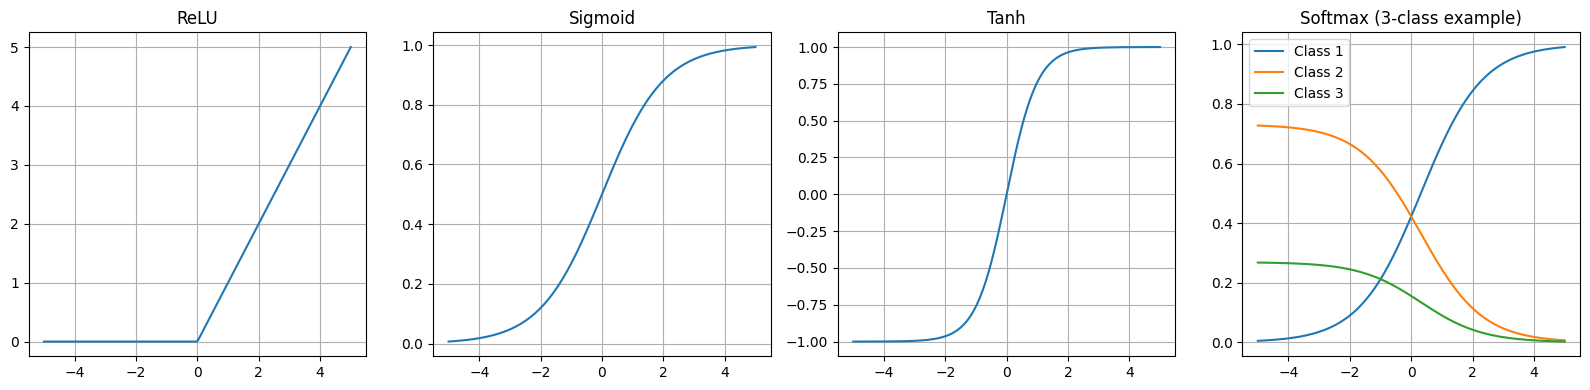

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x軸の値
x = np.linspace(-5, 5, 200)

# 活性化関数
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Softmax の例（3クラスのスコアを想定）
# x の値を「1つのスコア」として扱い、他の2つは固定
score1 = x
score2 = np.zeros_like(x)      # 固定スコア
score3 = -1 * np.ones_like(x)  # 固定スコア

# Softmax 計算
exp_scores = np.exp(np.vstack([score1, score2, score3]))
softmax = exp_scores / np.sum(exp_scores, axis=0)

# グラフ描画
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.plot(x, relu)
plt.title("ReLU")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(x, sigmoid)
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(x, tanh)
plt.title("Tanh")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(x, softmax[0], label="Class 1")
plt.plot(x, softmax[1], label="Class 2")
plt.plot(x, softmax[2], label="Class 3")
plt.title("Softmax (3-class example)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. 損失関数とは？

損失関数は、モデルがどれだけ間違えているかを数値化する指標です。

MNIST の分類では  
**CrossEntropyLoss（交差エントロピー損失）**  
がよく使われます。

## 5. 学習と推論の違い

### ● 学習（Training）
- 正解ラベルを使う  
- 損失を計算  
- 逆伝播で重みを更新  

### ● 推論（Inference）
- 正解ラベルは使わない  
- 学習済みの重みで予測するだけ  

## 6. CrossEntropyLoss を実際に計算してみる

損失関数は「モデルがどれだけ間違えているか」を数値化する指標です。

MNIST のような分類問題では  
**CrossEntropyLoss（交差エントロピー損失）**  
がよく使われます。

ここでは、PyTorch を使って実際に損失を計算し、  
「正しい予測だと損失が小さくなる」ことを体験します。

下記のソースコードでは、3クラス分類モデルの出力（logits）と正解ラベルを使って、
CrossEntropyLoss（交差エントロピー誤差） による損失を 1 つの数値として計算しています。

ニューラルネットワークの学習では、次の 3 つのステップが重要です：

　　①. 予測する（forward）

　　②. 損失を計算する（loss）

　　③. 損失が小さくなるようにパラメータを更新する（backward + optimizer）

このコードでは、ステップ②の「損失を計算する」を行っています。

CrossEntropyLoss は、

- logits（softmax 前の生のスコア）
- 正解ラベル（クラス番号）

を入力として、モデルの予測がどれだけ正解からズレているかを計算します。

今回の例では、損失は 0.2633 となりました。

これは「モデルの予測はそこそこ正しいが、まだ改善の余地がある」という意味の値です。


In [ ]:
import torch
import torch.nn as nn

# CrossEntropyLoss の準備
criterion = nn.CrossEntropyLoss()

# 仮の予測（logits）と正解ラベル
# 例：3クラス分類で、バッチサイズ2
logits = torch.tensor([[2.0, 1.0, 0.1],
                       [0.1, 3.0, 0.2]])  # モデルの出力（生のスコア）

labels = torch.tensor([0, 1])  # 正解ラベル

# 損失を計算
loss = criterion(logits, labels)

print("CrossEntropyLoss:", loss.item())

CrossEntropyLoss: 0.26331570744514465


上記の結果（CrossEntropyLoss: 0.263・・・）を踏まえて、
下記のコードでは、正解に近い予測 と 正解から遠い予測 の 2 つの例を使って、CrossEntropyLoss がどのように変化するかを確認しています。

- 正解に近い予測（クラス0のスコアが圧倒的に高い）
→ 損失がとても小さい（0.0147）

- 正解から遠い予測（間違ったクラス1のスコアが高い）
→ 損失がとても大きい（4.91）

このように、モデルの予測が正解に近いほど損失は小さくなり、間違っているほど損失は大きくなります。

ニューラルネットワークの学習では、この損失が小さくなるようにパラメータを少しずつ更新していき、最終的に精度を高めていきます。




In [ ]:
# 正解に近い予測
logits_good = torch.tensor([[5.0, 0.1, 0.1]])  # 正解クラス(0)が圧倒的に高い
labels_good = torch.tensor([0])

# 正解から遠い予測
logits_bad = torch.tensor([[0.1, 5.0, 0.1]])  # 間違ったクラス(1)が高い
labels_bad = torch.tensor([0])

loss_good = criterion(logits_good, labels_good)
loss_bad = criterion(logits_bad, labels_bad)

print("正解に近い予測の損失:", loss_good.item())
print("正解から遠い予測の損失:", loss_bad.item())

正解に近い予測の損失: 0.014783242717385292
正解から遠い予測の損失: 4.914783477783203


## ▶ 次のステップ

Vol.4 では  
**「実習環境の準備（GitHub & Colab）」**  
を行い、実際にコードを動かす準備を整えます。